In [1]:
#pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [5]:
import seaborn as sns

In [6]:
import imblearn
from imblearn.over_sampling import SMOTE

In [7]:
from collections import Counter

In [8]:
import pickle

In [9]:
df = pd.read_csv("log_dataset.csv")

In [10]:
pd.set_option("display.max_colwidth", None)
df.head()

,username,log_entry
0,george,"14.94.217.222 - - [27/Dec/2037:12:00:00 +0000] ""['GET'] ['/usr'] HTTP/1.0"" ['303'] 5041 ""['http://morgan.biz/wp-contentcategory.htm']"" ""['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']"" 4077\n"
1,paul,"193.223.88.250 - - [27/Dec/2037:12:00:00 +0000] ""['GET'] ['/usr/register'] HTTP/1.0"" ['502'] 5063 ""['-']"" ""['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']"" 2491\n"
2,george,"111.75.113.143 - - [27/Dec/2037:12:00:00 +0000] ""['GET'] ['/usr/admin'] HTTP/1.0"" ['304'] 5055 ""['http://morgan.biz/wp-contentcategory.htm']"" ""['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36']"" 2646\n"
3,george,"129.185.58.19 - - [27/Dec/2037:12:00:00 +0000] ""['POST'] ['/usr/admin'] HTTP/1.0"" ['403'] 4931 ""['http://morgan.biz/wp-contentcategory.htm']"" ""['Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0']"" 834\n"
4,john,"40.181.173.69 - - [27/Dec/2037:12:00:00 +0000] ""['POST'] ['/usr'] HTTP/1.0"" ['304'] 5014 ""['-']"" ""['Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1']"" 3221\n"


# **Clean the data**

In [11]:
# Split the 'log_entry" column into multiple columns wherever the '"' character appears. Give the new columns, new names
df[['IP and Event Time','Request Type and Endpoint','Status Code','Referrer','4','User Agent','6']] = df['log_entry'].str.split('"', expand=True)
df.drop(columns=['log_entry'], inplace=True)
df.head()

,username,IP and Event Time,Request Type and Endpoint,Status Code,Referrer,4,User Agent,6
0,george,14.94.217.222 - - [27/Dec/2037:12:00:00 +0000],['GET'] ['/usr'] HTTP/1.0,['303'] 5041,['http://morgan.biz/wp-contentcategory.htm'],,"['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']",4077\n
1,paul,193.223.88.250 - - [27/Dec/2037:12:00:00 +0000],['GET'] ['/usr/register'] HTTP/1.0,['502'] 5063,['-'],,"['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']",2491\n
2,george,111.75.113.143 - - [27/Dec/2037:12:00:00 +0000],['GET'] ['/usr/admin'] HTTP/1.0,['304'] 5055,['http://morgan.biz/wp-contentcategory.htm'],,"['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36']",2646\n
3,george,129.185.58.19 - - [27/Dec/2037:12:00:00 +0000],['POST'] ['/usr/admin'] HTTP/1.0,['403'] 4931,['http://morgan.biz/wp-contentcategory.htm'],,['Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0'],834\n
4,john,40.181.173.69 - - [27/Dec/2037:12:00:00 +0000],['POST'] ['/usr'] HTTP/1.0,['304'] 5014,['-'],,"['Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1']",3221\n


In [12]:
# Split the 'IP and Event Time column into IP and Event Time. Drop the original columnn
df[['IP','Event Time']] = df['IP and Event Time'].str.split('- -', expand=True)
df.drop(columns=['IP and Event Time'], inplace=True)

In [13]:
# In the 'Request Type and Endpoint' column drop the 'HTTP/1.0' string
df['Request Type and Endpoint'] = df['Request Type and Endpoint'].str.replace('HTTP/1.0', '')

In [14]:
# Check what's in column '4'
df['4'].unique()

array([' '], dtype=object)

In [15]:
# Since there's nothing in column '4', drop it
df.drop(columns=['4'],inplace=True)

In [16]:
# remove square brackets in every column
for c in df.columns:
    df[c] = df[c].str.replace("]","")
    df[c] = df[c].str.replace("[","")

In [17]:
# Split the 'Request Type and Endpoint' column into separate 'Request Type' and 'Endpoint' columns
df[['Request Type','Endpoint']] = df['Request Type and Endpoint'].str.split(' ', expand=True).drop(columns=[2])
df.drop(columns=['Request Type and Endpoint'], inplace=True)

In [18]:
df['Status Code']

0         '303' 5041 
1         '502' 5063 
2         '304' 5055 
3         '403' 4931 
4         '304' 5014 
             ...     
99995     '403' 4948 
99996     '500' 4983 
99997     '500' 5016 
99998     '304' 5084 
99999     '502' 5066 
Name: Status Code, Length: 100000, dtype: object

In [19]:
# Split the 'Status Code' column into a column for the 'Status Code' and another one for the 'Status Code Number'
df[['Status Code','Status Code Number']] = df['Status Code'].str.split(" ", expand=True).drop(columns=[0,3])


In [20]:
df.head()

,username,Status Code,Referrer,User Agent,6,IP,Event Time,Request Type,Endpoint,Status Code Number
0,george,'303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",4077\n,14.94.217.222,27/Dec/2037:12:00:00 +0000,'GET','/usr',5041
1,paul,'502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",2491\n,193.223.88.250,27/Dec/2037:12:00:00 +0000,'GET','/usr/register',5063
2,george,'304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",2646\n,111.75.113.143,27/Dec/2037:12:00:00 +0000,'GET','/usr/admin',5055
3,george,'403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',834\n,129.185.58.19,27/Dec/2037:12:00:00 +0000,'POST','/usr/admin',4931
4,john,'304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",3221\n,40.181.173.69,27/Dec/2037:12:00:00 +0000,'POST','/usr',5014


In [21]:
# Rearrange the columns in the dataframe 
df = df[['username','Event Time','Request Type','Endpoint','Status Code','Referrer','User Agent','IP','Status Code Number','6']]

In [22]:
df.head()

,username,Event Time,Request Type,Endpoint,Status Code,Referrer,User Agent,IP,Status Code Number,6
0,george,27/Dec/2037:12:00:00 +0000,'GET','/usr','303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",14.94.217.222,5041,4077\n
1,paul,27/Dec/2037:12:00:00 +0000,'GET','/usr/register','502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",193.223.88.250,5063,2491\n
2,george,27/Dec/2037:12:00:00 +0000,'GET','/usr/admin','304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",111.75.113.143,5055,2646\n
3,george,27/Dec/2037:12:00:00 +0000,'POST','/usr/admin','403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',129.185.58.19,4931,834\n
4,john,27/Dec/2037:12:00:00 +0000,'POST','/usr','304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",40.181.173.69,5014,3221\n


## Event Time 

In [23]:
df['Event Time'].unique()

array([' 27/Dec/2037:12:00:00 +0000 '], dtype=object)

In [24]:
#In the Event Time column remove '+0000' 
df['Event Time'] = df['Event Time'].str.replace('+0000','')

In [25]:
#In the Event Time column change the year from '2037' to '2023'
#df['Event Time'] = df['Event Time'].str.replace('2037','2017')

In [26]:
#remove empty spaces before and after the string
df['Event Time'] = df['Event Time'].str.strip()

### Turn Event Time into a datetime variable and created another column for 'Elapsed time'

In [27]:
# Convert the 'Event Time' column to a date time format
df['Event Time'] = pd.to_datetime(df['Event Time'], format= '%d/%b/%Y:%H:%M:%S')

In [28]:
df['Event Time'].unique()

<DatetimeArray>
['2037-12-27 12:00:00']
Length: 1, dtype: datetime64[ns]

In [29]:
# create a new column in df that contains the starting time for each username
df['starting date'] = df.groupby('username')['Event Time'].transform('min')

In [30]:
# create a new column called Elapsed time, where the column values are calculated as being the difference between the instantaneous time and the starting time.
df['Elapsed_time'] = pd.to_timedelta(df['Event Time'] - df['starting date']).dt.total_seconds()

In [31]:
# get the min and max values from the Elapsed_time column
df['Elapsed_time'].min(), df['Elapsed_time'].max()

(0.0, 0.0)

In [32]:
df.head()

,username,Event Time,Request Type,Endpoint,Status Code,Referrer,User Agent,IP,Status Code Number,6,starting date,Elapsed_time
0,george,2037-12-27 12:00:00,'GET','/usr','303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0
1,paul,2037-12-27 12:00:00,'GET','/usr/register','502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0
2,george,2037-12-27 12:00:00,'GET','/usr/admin','304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0
3,george,2037-12-27 12:00:00,'POST','/usr/admin','403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0
4,john,2037-12-27 12:00:00,'POST','/usr','304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0


## username

In [33]:
# Check how many unique usernames there are and what those usernames are
print("number of unique usernames =", len(df['username'].unique()))
print("usernames =", df['username'].unique())

number of unique usernames = 4
usernames = ['george' 'paul' 'john' 'ringo']


In [34]:
#Check for class imbalance
df.groupby(df['username']).size()

username
george    31340
john      31421
paul      31373
ringo      5866
dtype: int64

In [35]:
ringo_number = len(df[df['username']=='ringo'])
ringo_number

5866

In [36]:
george_number = len(df[df['username']=='george'])
john_number = len(df[df['username']=='john'])
paul_number = len(df[df['username']=='paul'])

In [37]:
# drop entries under username for george, john and paul in order to match the number of entries for ringo

#drop_indicies_george = np.random.choice(df[df['username']=='george'].index, (george_number - ringo_number), replace=False)
#drop_indicies_john = np.random.choice(df[df['username']=='john'].index, (john_number - ringo_number), replace=False)
#drop_indicies_paul = np.random.choice(df[df['username']=='paul'].index, (paul_number - ringo_number), replace=False)
#df_subset_1 = df.drop(drop_indicies_george)
#df_subset_2 = df_subset_1.drop(drop_indicies_john)
#df_subset_3 = df_subset_2.drop(drop_indicies_paul)

In [38]:
#Check for class imbalance
#df_subset_3.groupby(df['username']).size()

In [39]:
#df = df_subset_3

In [40]:
# Label encode the username
#df['username encoded'] = df['username'].astype('category').cat.codes

In [41]:
#get one hot encoding columns of Request Types column
one_hot_usernames = pd.get_dummies(df['username'], prefix='username', dtype=int)

#drop Request Types column from df
df.drop(['username'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_usernames)

In [42]:
df.head()

,Event Time,Request Type,Endpoint,Status Code,Referrer,User Agent,IP,Status Code Number,6,starting date,Elapsed_time,username_george,username_john,username_paul,username_ringo
0,2037-12-27 12:00:00,'GET','/usr','303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0,1,0,0,0
1,2037-12-27 12:00:00,'GET','/usr/register','502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0,0,0,1,0
2,2037-12-27 12:00:00,'GET','/usr/admin','304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0,1,0,0,0
3,2037-12-27 12:00:00,'POST','/usr/admin','403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0,1,0,0,0
4,2037-12-27 12:00:00,'POST','/usr','304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0,0,1,0,0


## Request Types

In [43]:
# Check how many unique Request Types there are and what those Request Types are
print("number of unique Request Types =", len(df['Request Type'].unique()))
print("Types of Request Types =", df['Request Type'].unique())

number of unique Request Types = 4
Types of Request Types = ["'GET'" "'POST'" "'DELETE'" "'PUT'"]


In [44]:
#since the labels in Request Types are non-ordinal and there are only four of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_request_types = pd.get_dummies(df['Request Type'], prefix='Request_Type', dtype=int)

#drop Request Types column from df
df.drop(['Request Type'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_request_types)

## Endpoint

In [45]:
# Check how many unique Endpoints there are 
print("number of unique Endpoints =", len(df['Endpoint'].unique()))


number of unique Endpoints = 5


In [46]:
#since the labels in Endpoint are non-ordinal and there are only 5 of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_endpoints = pd.get_dummies(df['Endpoint'], prefix='Endpoint', dtype=int)

#drop Request Types column from df
df.drop(['Endpoint'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_endpoints)

## Status Codes

In [47]:
# Check how many unique Status Codes there are too.
print("number of unique Status Codes =", len(df['Status Code'].unique()))

number of unique Status Codes = 7


In [48]:
#since the labels in Status Code are non-ordinal and there are only 7 of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_status_code = pd.get_dummies(df['Status Code'], prefix='Status_Code', dtype=int)

#drop Request Types column from df
df.drop(['Status Code'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_status_code)

## Referrers

In [49]:
# Get number of unique Referrers
print(len(df['Referrer'].unique()))

2


In [50]:
# Get unique Referrers
print("Types of Referrer =", df['Referrer'].unique())

Types of Referrer = ["'http://morgan.biz/wp-contentcategory.htm'" "'-'"]


In [51]:
#since the labels in Referrer are non-ordinal and there are only 2 of them, best to use one-hot encoding here

#get one hot encoding columns of Referrer column
one_hot_referrer = pd.get_dummies(df['Referrer'], prefix='Referrer', dtype=int)

#drop Request Types column from df
df.drop(['Referrer'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_referrer)

## User Agents

In [52]:
# Get unique User Agents
len(df['User Agent'].unique())

10

In [53]:
#since the labels in User Agent are non-ordinal and there are only 10 of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_user_agents = pd.get_dummies(df['User Agent'], prefix='User_Agent', dtype=int)

#drop Request Types column from df
df.drop(['User Agent'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_user_agents)

In [54]:
df.head()

,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username_george,username_john,username_paul,username_ringo,...,User_Agent_'Mozilla/5.0 (Android 10; Mobile; rv:84.0) Gecko/84.0 Firefox/84.0',"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'"
0,2037-12-27 12:00:00,14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2037-12-27 12:00:00,193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2037-12-27 12:00:00,111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2037-12-27 12:00:00,129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2037-12-27 12:00:00,40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## IP

In [55]:
# Get number of unique IP
print(len(df['IP'].unique()))

99999


In [56]:
# Check for duplicates
df.duplicated().any()

False

In [57]:
#Get any IP addresses that appear more than once
#df['IP'].value_counts()[df['IP'].value_counts() > 1].index[0]

In [58]:
#Get rows where IP address appears more than once
df[df['IP'].map(df['IP'].value_counts()) > 1]

,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username_george,username_john,username_paul,username_ringo,...,User_Agent_'Mozilla/5.0 (Android 10; Mobile; rv:84.0) Gecko/84.0 Firefox/84.0',"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'"
20495,2037-12-27 12:00:00,172.68.193.171,4964,2669\n,2037-12-27 12:00:00,0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
59848,2037-12-27 12:00:00,172.68.193.171,5019,3705\n,2037-12-27 12:00:00,0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
# Label encode the IP column
df['IP encoded'] = df['IP'].astype('category').cat.codes

In [60]:
df.head()

,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username_george,username_john,username_paul,username_ringo,...,"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",IP encoded
0,2037-12-27 12:00:00,14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,20290
1,2037-12-27 12:00:00,193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,46496
2,2037-12-27 12:00:00,111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,6704
3,2037-12-27 12:00:00,129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,14637
4,2037-12-27 12:00:00,40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,70548


In [61]:
#Check that the IP column label encoding was done properly, i.e. the same repeating IP should also have repeating encoded IPs
df[df['IP'].map(df['IP'].value_counts()) > 1]

,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username_george,username_john,username_paul,username_ringo,...,"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",IP encoded
20495,2037-12-27 12:00:00,172.68.193.171,4964,2669\n,2037-12-27 12:00:00,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,36381
59848,2037-12-27 12:00:00,172.68.193.171,5019,3705\n,2037-12-27 12:00:00,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,36381


# **EDA**

In [62]:
df.dtypes

Event Time                                                                                                                                                          datetime64[ns]
IP                                                                                                                                                                          object
Status Code Number                                                                                                                                                          object
6                                                                                                                                                                           object
starting date                                                                                                                                                       datetime64[ns]
Elapsed_time                                                                                             

In [63]:
df_2 = df.drop(columns=['Status Code Number','Elapsed_time','Event Time','IP','6','starting date','IP encoded'])

In [64]:
#contruct a PMCC matrix on the combined data
corr_matrix = df_2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,username_george,username_john,username_paul,username_ringo,Request_Type_'DELETE',Request_Type_'GET',Request_Type_'POST',Request_Type_'PUT',Endpoint_'/usr',Endpoint_'/usr/admin',Endpoint_'/usr/admin/developer',Endpoint_'/usr/login',Endpoint_'/usr/register',Status_Code_'200',Status_Code_'303',Status_Code_'304',Status_Code_'403',Status_Code_'404',Status_Code_'500',Status_Code_'502',Referrer_'-',Referrer_'http://morgan.biz/wp-contentcategory.htm',User_Agent_'Mozilla/5.0 (Android 10; Mobile; rv:84.0) Gecko/84.0 Firefox/84.0',"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'"
username_george,1.000000,-0.457311,-0.456802,-0.168654,-0.010182,0.072307,0.038965,-0.137003,0.117618,0.172440,0.004999,-0.261295,0.003198,0.050374,0.036245,0.101984,0.090236,-0.009393,-0.152201,-0.081591,0.001511,-0.001511,0.259314,0.095624,-0.041873,0.017854,0.062963,-0.064314,-0.018233,-0.182871,0.108555,-0.157272
username_john,-0.457311,1.000000,-0.457662,-0.168971,-0.152704,-0.010598,0.109780,0.091839,0.151606,0.061055,-0.192605,0.100559,-0.141169,-0.049590,-0.034396,-0.046270,-0.028814,0.006544,0.098210,0.027918,-0.000492,0.000492,-0.165865,-0.151049,0.219020,-0.064734,0.061532,0.019073,-0.116443,0.045152,0.095569,0.049068
username_paul,-0.456802,-0.457662,1.000000,-0.168783,0.216664,-0.066755,-0.156862,-0.015446,-0.241112,-0.232350,0.159047,0.129828,0.161959,0.008487,-0.007704,-0.037677,-0.013022,-0.028410,0.034901,0.033648,0.000412,-0.000412,-0.120374,0.100161,-0.186045,0.083005,-0.160481,0.018094,0.140419,0.121842,-0.212951,0.125999
username_ringo,-0.168654,-0.168971,-0.168783,1.000000,-0.106073,0.010012,0.015960,0.119531,-0.055568,-0.002216,0.056554,0.060799,-0.047248,-0.018238,0.011609,-0.035520,-0.095495,0.061713,0.037530,0.039473,-0.002824,0.002824,0.053449,-0.088158,0.017368,-0.071271,0.071044,0.053553,-0.011256,0.031212,0.017413,-0.035268
Request_Type_'DELETE',-0.010182,-0.152704,0.216664,-0.106073,1.000000,-0.459501,-0.416120,-0.268955,-0.045192,-0.044985,0.037568,0.004306,0.045088,0.010970,0.000454,-0.000194,0.011413,-0.014979,-0.005176,-0.001774,0.002611,-0.002611,-0.009929,0.040109,-0.051581,0.029604,-0.035109,-0.003540,0.033355,0.010680,-0.047965,0.017367
Request_Type_'GET',0.072307,-0.010598,-0.066755,0.010012,-0.459501,1.000000,-0.363934,-0.235226,0.015361,0.018998,-0.004566,-0.015671,-0.010574,0.002496,0.004472,0.010089,0.001175,-0.002091,-0.008175,-0.005438,-0.002642,0.002642,0.023723,-0.000224,0.007287,-0.003675,0.010749,-0.002088,-0.009662,-0.018221,0.017606,-0.015292
Request_Type_'POST',0.038965,0.109780,-0.156862,0.015960,-0.416120,-0.363934,1.000000,-0.213018,0.037596,0.035849,-0.032681,-0.010877,-0.028342,-0.003022,-0.003941,-0.000301,0.003479,0.004266,-0.000471,-0.000454,0.002913,-0.002913,0.006431,-0.017715,0.032663,-0.018180,0.026

# Random train, validation, test split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
df_2.shape

(100000, 32)

In [67]:
y = df_2[['username_george','username_john','username_paul','username_ringo']]

In [68]:
y.shape

(100000, 4)

In [69]:
X = df_2.loc[:, ~df_2.columns.isin(['username_george','username_john','username_paul','username_ringo'])]

In [70]:
X.shape

(100000, 28)

In [71]:
X_training, X_test_1, y_training, y_test_1 = train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
X_training.shape, y_training.shape

((80000, 28), (80000, 4))

In [73]:
X_test, X_validation, y_test, y_validation = train_test_split(X_test_1, y_test_1, test_size=0.50, random_state=42)

In [74]:
X_validation.shape, y_validation.shape

((10000, 28), (10000, 4))

In [75]:
X_test.shape, y_test.shape

((10000, 28), (10000, 4))

# Model - Keras sequential layer

In [76]:
model = Sequential()

model.add(Dense(64, activation='tanh', input_dim=28))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', input_dim=28))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

In [77]:
# For a multi-class classification problem
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [148]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_training, y_training, epochs=10, batch_size=28)

Epoch 1/10
2858/2858 [==============================] - 8s 3ms/step - loss: 0.9009 - accuracy: 0.6189
Epoch 2/10
2858/2858 [==============================] - 11s 4ms/step - loss: 0.9008 - accuracy: 0.6202
Epoch 3/10
2858/2858 [==============================] - 10s 4ms/step - loss: 0.9001 - accuracy: 0.6195
Epoch 4/10
2858/2858 [==============================] - 11s 4ms/step - loss: 0.9004 - accuracy: 0.6193
Epoch 5/10
2858/2858 [==============================] - 13s 4ms/step - loss: 0.9005 - accuracy: 0.6195
Epoch 6/10
2858/2858 [==============================] - 10s 4ms/step - loss: 0.8986 - accuracy: 0.6202
Epoch 7/10
2858/2858 [==============================] - 9s 3ms/step - loss: 0.8990 - accuracy: 0.6195
Epoch 8/10
2858/2858 [==============================] - 11s 4ms/step - loss: 0.8999 - accuracy: 0.6195
Epoch 9/10
2858/2858 [==============================] - 10s 4ms/step - loss: 0.8997 - accuracy: 0.6201
Epoch 10/10
2858/2858 [==============================] - 8s 3ms/step - loss

In [149]:
y_hat_training = model.predict(X_training)

2500/2500 [==============================] - 2s 774us/step


In [150]:
y_hat_training

array([[0.2820312 , 0.11845221, 0.5967476 , 0.00276899],
       [0.31918612, 0.625315  , 0.00185962, 0.05363929],
       [0.22815281, 0.7170839 , 0.00152421, 0.05323913],
       ...,
       [0.42395267, 0.5089167 , 0.05890732, 0.00822328],
       [0.25128618, 0.62184775, 0.08503632, 0.04182972],
       [0.07776119, 0.20120196, 0.7085432 , 0.01249365]], dtype=float32)

In [151]:
# round up the y predictions numpy array
y_hat_training = np.round(y_hat_training)
y_hat_training = y_hat_training.astype(int)

In [82]:
y_hat_training

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [83]:
y_training

,username_george,username_john,username_paul,username_ringo
75220,1,0,0,0
48955,1,0,0,0
44966,1,0,0,0
13568,0,1,0,0
92727,0,0,1,0
...,...,...,...,...
6265,0,0,1,0
54886,0,1,0,0
76820,0,1,0,0
860,0,1,0,0


In [84]:
# Turn the one hot encoded columns for y_hat_training into a single label encoded column
y_hat_training_label = np.argmax(y_hat_training, axis=1)

In [85]:
y_hat_training_label

array([2, 1, 1, ..., 1, 1, 2], dtype=int64)

In [86]:
# Turn the one hot encoded columns for y_training into a single label encoded column
y_training_label = np.argmax(y_training, axis=1)

In [87]:
y_training_label

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [88]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [89]:
accuracy(y_training, y_hat_training)

0.81385

# Save model

In [90]:
keras_pickle = open("keras_tanh_relu_relu_softmax_adam_opt_0.1do_class_drop_scikit_split", 'wb')
pickle.dump(model, keras_pickle)

In [91]:
keras_pickle.close()

# Load saved model

In [92]:
#load the softmax model
keras_from_pickle = pickle.load(open('keras_tanh_relu_relu_softmax_adam_opt_0.1do_class_drop_scikit_split', 'rb'))

In [93]:
# Use the saved model to predict y values with the training set X
y_hat_training = keras_from_pickle.predict(X_training)

2500/2500 [==============================] - 10s 4ms/step


In [94]:
y_hat_training

array([[1.1062765e-01, 7.4344009e-02, 8.1455195e-01, 4.7639452e-04],
       [3.2391274e-01, 6.1630839e-01, 2.5675008e-03, 5.7211332e-02],
       [2.1491186e-01, 7.3848683e-01, 1.2519666e-03, 4.5349330e-02],
       ...,
       [3.7791163e-01, 5.5363500e-01, 4.4775549e-02, 2.3677794e-02],
       [2.7216187e-01, 5.9204513e-01, 1.0475746e-01, 3.1035500e-02],
       [6.2309671e-02, 1.3781624e-01, 7.9645485e-01, 3.4193567e-03]],
      dtype=float32)

In [95]:
y_hat_training = np.round(y_hat_training)
y_hat_training = y_hat_training.astype(int)

In [96]:
y_hat_training.shape

(80000, 4)

In [97]:
y_training.shape

(80000, 4)

In [98]:
y_hat_training_label = np.argmax(y_hat_training, axis=1)

In [99]:
y_training_label = np.argmax(y_training, axis=1)

In [100]:
# Construct a confusion matrix for the training set
cm = confusion_matrix(y_training_label, y_hat_training_label)

In [101]:
cm_df = pd.DataFrame(cm, 
                     index = ['george','john','paul','ringo'],
                     columns = ['george','john','paul','ringo'])

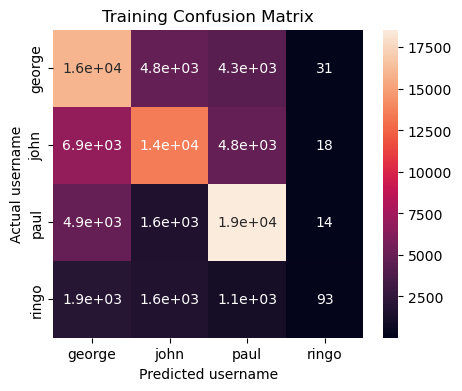

In [102]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Training Confusion Matrix')
plt.ylabel('Actual username')
plt.xlabel('Predicted username')
plt.show()

In [103]:
def calculate_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    
    tp = np.diag(confusion_matrix)
    fp = np.sum(confusion_matrix, axis=0) - tp
    fn = np.sum(confusion_matrix, axis=1) - tp
    tn = np.sum(confusion_matrix) - (tp + fp + fn)
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)    #also known as sensitivity or true positive rate
    specificity = tn/(tn+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    false_positive_rate = fp/(fp+tn)
    
    precision_george = precision[0]
    precision_john = precision[1]
    precision_paul = precision[2]
    precision_ringo = precision[3]
    average_precision = (precision_george + precision_john + precision_paul + precision_ringo)/4
    
    recall_george = recall[0]
    recall_john = recall[1]
    recall_paul = recall[2]
    recall_ringo = recall[3]
    average_recall = (recall_george + recall_john + recall_paul + recall_ringo)/4
    
    accuracy_george = accuracy[0]
    accuracy_john = accuracy[1]
    accuracy_paul = accuracy[2]
    accuracy_ringo = accuracy[3]
    average_accuracy = (accuracy_george + accuracy_john + accuracy_paul + accuracy_ringo)/4
    
    f1_george = f1[0]
    f1_john = f1[1]
    f1_paul = f1[2]
    f1_ringo = f1[3]
    average_f1 = (f1_george + f1_john + f1_paul + f1_ringo)/4
    
    df = pd.DataFrame({"precision":[precision_george,precision_john,precision_paul,precision_ringo], \
                       "recall":[recall_george,recall_john,recall_paul,recall_ringo], \
                       "accuracy":[accuracy_george,accuracy_john,accuracy_paul,accuracy_ringo], \
                       "f1":[f1_george,f1_john,f1_paul,f1_ringo]
                      }, index=['george','john','paul','ringo'])
    
    df_2 = pd.DataFrame({"precision":[average_precision], \
                       "recall":[average_recall], \
                       "accuracy":[average_accuracy], \
                       "f1":[average_f1]  
                      }, index=['model average overall'])

    return tp, fp, fn, tn, df, df_2

In [104]:
tp, fp, fn, tn, conf_df, conf_df_2 =calculate_metrics(cm)

<Axes: >

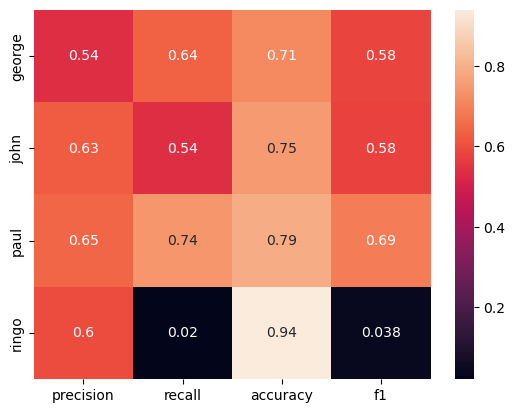

In [105]:
sns.heatmap(conf_df, annot=True)

In [106]:
conf_df_2

,precision,recall,accuracy,f1
model average overall,0.601682,0.483075,0.800344,0.472151


### Validation set

In [135]:
y_hat_validation = keras_from_pickle.predict(X_validation)

313/313 [==============================] - 0s 926us/step


In [136]:
y_hat_validation = np.round(y_hat_validation)
y_hat_validation = y_hat_validation.astype(int)

In [137]:
y_hat_validation.shape

(10000, 4)

In [138]:
y_validation.shape

(10000, 4)

In [139]:
y_hat_validation_label = np.argmax(y_hat_validation, axis=1)

In [140]:
y_validation_label = np.argmax(y_validation, axis=1)

In [141]:
# Construct a confusion matrix for the training set
cm_val = confusion_matrix(y_validation_label, y_hat_validation_label)

In [142]:
cm_val_df = pd.DataFrame(cm_val, 
                     index = ['george','john','paul','ringo'],
                     columns = ['george','john','paul','ringo'])

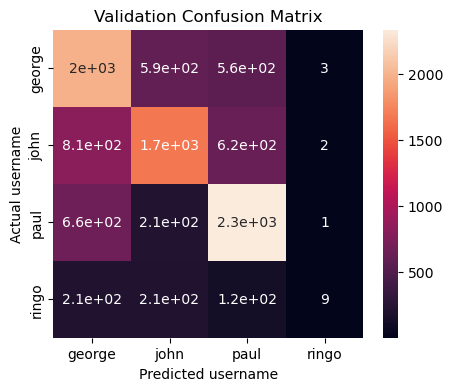

In [143]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_val_df, annot=True)
plt.title('Validation Confusion Matrix')
plt.ylabel('Actual username')
plt.xlabel('Predicted username')
plt.show()

In [144]:
tp_val, fp_val, fn_val, tn_val, conf_df_val, conf_df_val_2 =calculate_metrics(cm_val)

<Axes: >

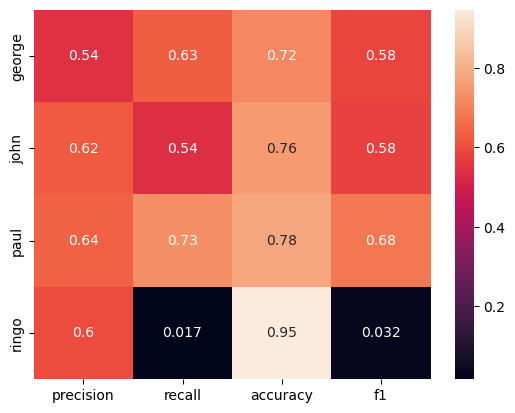

In [145]:
sns.heatmap(conf_df_val, annot=True)

In [146]:
conf_df_val_2

,precision,recall,accuracy,f1
model average overall,0.602121,0.478995,0.8003,0.469184


### Test set

### Evaluate model

In [132]:
results = model.evaluate(X_test, y_test, batch_size=28)

358/358 [==============================] - 0s 893us/step - loss: 0.9184 - accuracy: 0.6091


In [133]:
print("test loss, test acc:", results)

test loss, test acc: [0.9184097647666931, 0.6090999841690063]


In [119]:
y_hat_test = keras_from_pickle.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [120]:
y_hat_test = np.round(y_hat_test)
y_hat_test = y_hat_test.astype(int)

In [121]:
y_hat_test.shape

(10000, 4)

In [122]:
y_test.shape

(10000, 4)

In [123]:
y_hat_test_label = np.argmax(y_hat_test, axis=1)

In [124]:
y_test_label = np.argmax(y_test, axis=1)

In [125]:
# Construct a confusion matrix for the training set
cm_test = confusion_matrix(y_test_label, y_hat_test_label)

In [126]:
cm_test_df = pd.DataFrame(cm_test, 
                     index = ['george','john','paul','ringo'],
                     columns = ['george','john','paul','ringo'])

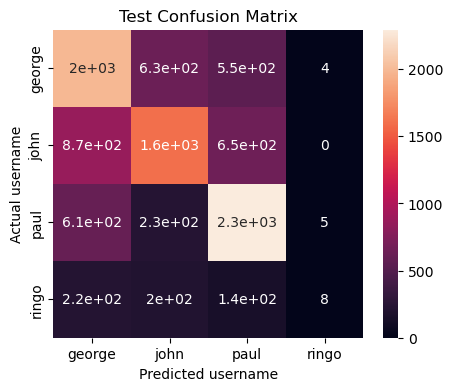

In [127]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_test_df, annot=True)
plt.title('Test Confusion Matrix')
plt.ylabel('Actual username')
plt.xlabel('Predicted username')
plt.show()

In [128]:
tp_test, fp_test, fn_test, tn_test, conf_df_test, conf_df_test_2 =calculate_metrics(cm_test)

<Axes: >

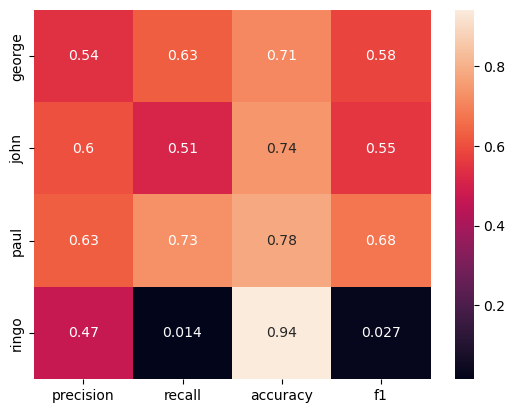

In [129]:
sns.heatmap(conf_df_test, annot=True)

In [130]:
conf_df_test_2

,precision,recall,accuracy,f1
model average overall,0.560669,0.47156,0.7946,0.459682
